# Performans Ölçüm Metrikleri

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('train.csv')
df= df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
df['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [7]:
df['Sex']= pd.get_dummies(df['Sex'])

In [8]:
df['Embarked']= df['Embarked'].replace({"C":0,"S":1,"Q":2})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null uint8
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null int64
dtypes: float64(2), int64(6), object(3), uint8(1)
memory usage: 17.3+ KB


In [10]:
X = df.drop(["Survived","Name","Ticket","Cabin"], axis=1)
y= df['Survived']

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size= 0.20 , random_state= 42)

In [14]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
tahmin_train = log_reg.predict(X_train)
tahmin_test = log_reg.predict(X_test)

In [16]:
# confusion Matrix 
from sklearn.metrics import confusion_matrix

error_matrix_train = confusion_matrix(y_train,tahmin_train)
error_matrix_test = confusion_matrix(y_test,tahmin_test)

print("Error Matrix (Train Data)","-"*30, error_matrix_train,sep='\n')
print("Error Matrix (Test Data)","-"*30, error_matrix_test,sep='\n')

Error Matrix (Train Data)
------------------------------
[[29 17]
 [17 83]]
Error Matrix (Test Data)
------------------------------
[[ 8  6]
 [ 6 17]]


# Accuracy

In [24]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test,tahmin_test)
log_reg.score(X_test,y_test)

0.6756756756756757

# Precision

In [25]:
from sklearn.metrics import precision_score
precision_score(y_test,tahmin_test)

0.7391304347826086

# Recall/Sensitivity

In [26]:
from sklearn.metrics import recall_score

recall_score(y_test, tahmin_test)

0.7391304347826086

# Specificity

In [30]:
TN = error_matrix_test[0][0]
TP = error_matrix_test[1][1]
FP = error_matrix_test[0][1]
FN = error_matrix_test[1][0]
print("Calculated Specificity : ",  (TN)/(TN + FP))

Calculated Specificity :  0.5714285714285714


# f1_score

In [31]:
from sklearn.metrics import f1_score
f1_score(y_test,tahmin_test)

0.7391304347826085

In [34]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() : {:.2f} ".format(f1_score(y_test,tahmin_test)))

print("Recall_score(): {:.2f}".format(recall_score(y_test,tahmin_test)))

print("precison_score(): {:.2f}".format(precision_score(y_test,tahmin_test)))

print("\n")

metrikler = precision_recall_fscore_support(y_test,tahmin_test)
print("precision :", metrikler[0])
print("Recall :", metrikler[1])
print("f1 score :", metrikler[2])

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        14
           1       0.74      0.74      0.74        23

    accuracy                           0.68        37
   macro avg       0.66      0.66      0.66        37
weighted avg       0.68      0.68      0.68        37

f1_score() : 0.74 
Recall_score(): 0.74
precison_score(): 0.74


precision : [0.57142857 0.73913043]
Recall : [0.57142857 0.73913043]
f1 score : [0.57142857 0.73913043]


In [46]:
tahmin_test_ihtimal = log_reg.predict_proba(X_test)[:,1]

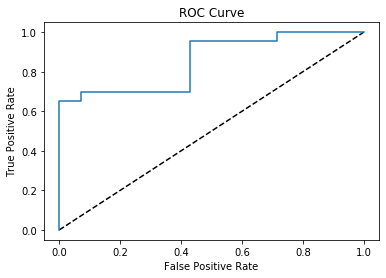

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Hassasiyet/Duyarlılık Eğrisi

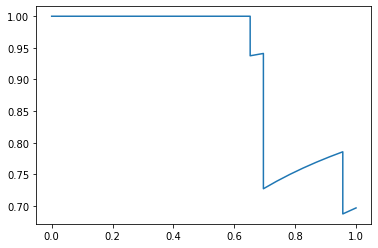

In [41]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [42]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.46901661185879767
Hata Oranı                  :  0.32432432432432434
